# A, B

In [2]:
import tensorflow as tf
from tensorflow import keras


(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_test = X_test
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
K = keras.backend


class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [4]:
import matplotlib.pyplot as plt


def plot_lr(expon_lr):
    plt.plot(expon_lr.rates, expon_lr.losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
    plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
    #plt.axis([min(expon_lr.rates), 0.015, 0, expon_lr.losses[0]])
    plt.grid()
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

1407/1407 [==============================] - 34s 16ms/step - loss: 3287171.7500 - accuracy: 0.1444 - val_loss: 6.6473 - val_accuracy: 0.1038


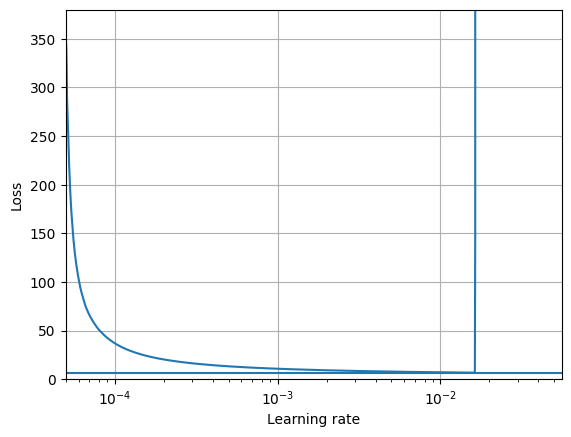

In [5]:
from tensorflow.keras import layers
import numpy as np


K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(layers.Dense(100, activation='elu',
                           kernel_initializer='he_normal'))

model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_data=(X_valid, y_valid),
    callbacks=[expon_lr]
)
plot_lr(expon_lr)

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
cd gdrive/MyDrive/MachineLearning/HandsOnMachineLearning/chapter11

/content/gdrive/MyDrive/MachineLearning/HandsOnMachineLearning/chapter11


In [8]:
import os
import time


def get_dir(dir, type_):
    id = time.strftime(f"{type_}_%Y_%m_%d-%H_%M_%S")
    root_dir = os.path.join(os.curdir, dir)
    return os.path.join(root_dir, id)

In [26]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(layers.Dense(100, activation='elu',
                           kernel_initializer='he_normal'))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model_dir = get_dir('models', 'model')
run_logdir = get_dir('my_logs', 'run')
os.makedirs('models', exist_ok=True)
os.makedirs(run_logdir, exist_ok=True)

earlystop_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_dir,
                                                save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=run_logdir)

model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[earlystop_cb, checkpoint_cb, tensorboard_cb]
)

Epoch 1/100
1407/1407 [==============================] - 29s 14ms/step - loss: 2.7935 - accuracy: 0.2227 - val_loss: 1.9089 - val_accuracy: 0.2826
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.9165 - accuracy: 0.2900 - val_loss: 1.8705 - val_accuracy: 0.3254
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.8531 - accuracy: 0.3189 - val_loss: 1.8993 - val_accuracy: 0.3000
Epoch 4/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.8113 - accuracy: 0.3363 - val_loss: 1.8926 - val_accuracy: 0.3082
Epoch 5/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7769 - accuracy: 0.3516 - val_loss: 1.7969 - val_accuracy: 0.3486
Epoch 6/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.7433 - accuracy: 0.3676 - val_loss: 1.8082 - val_accuracy: 0.3462
Epoch 7/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7078 - accuracy: 0.3799 - val_loss: 1

# C

1407/1407 [==============================] - 25s 12ms/step - loss: 54377848832.0000 - accuracy: 0.1354 - val_loss: 3.8492 - val_accuracy: 0.0920


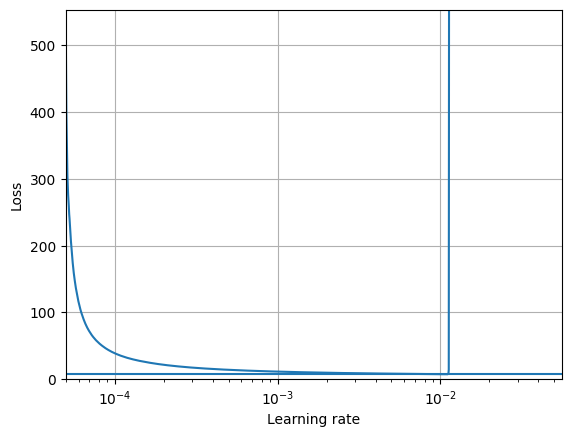

In [28]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    keras.layers.BatchNormalization(),
    model.add(layers.Dense(100, activation='elu',
              kernel_initializer='he_normal'))

model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_data=(X_valid, y_valid),
    callbacks=[expon_lr]
)
plot_lr(expon_lr)

In [29]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    keras.layers.BatchNormalization(),
    model.add(layers.Dense(100, activation='elu',
              kernel_initializer='he_normal'))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model_dir = get_dir('models', 'model_bn')
run_logdir = get_dir('my_logs', 'run_bn')
os.makedirs('models', exist_ok=True)
os.makedirs(run_logdir, exist_ok=True)

earlystop_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_dir,
                                                save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=run_logdir)

model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[earlystop_cb, checkpoint_cb, tensorboard_cb]
)

Epoch 1/100
1407/1407 [==============================] - 32s 17ms/step - loss: 2.7068 - accuracy: 0.2264 - val_loss: 1.9146 - val_accuracy: 0.2872
Epoch 2/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.9179 - accuracy: 0.2926 - val_loss: 1.8783 - val_accuracy: 0.3196
Epoch 3/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.8516 - accuracy: 0.3238 - val_loss: 1.8313 - val_accuracy: 0.3266
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8095 - accuracy: 0.3416 - val_loss: 1.8952 - val_accuracy: 0.3026
Epoch 5/100
1407/1407 [==============================] - 22s 15ms/step - loss: 1.7766 - accuracy: 0.3494 - val_loss: 1.8181 - val_accuracy: 0.3350
Epoch 6/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.7347 - accuracy: 0.3685 - val_loss: 1.6976 - val_accuracy: 0.3798
Epoch 7/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.7026 - accuracy: 0.3818 - val_loss: 1

# D

In [9]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

def std_scaling(dataset):
    return (dataset - X_means) / X_stds

1407/1407 [==============================] - 28s 14ms/step - loss: 1026755.8750 - accuracy: 0.2203 - val_loss: 2.5235 - val_accuracy: 0.1038


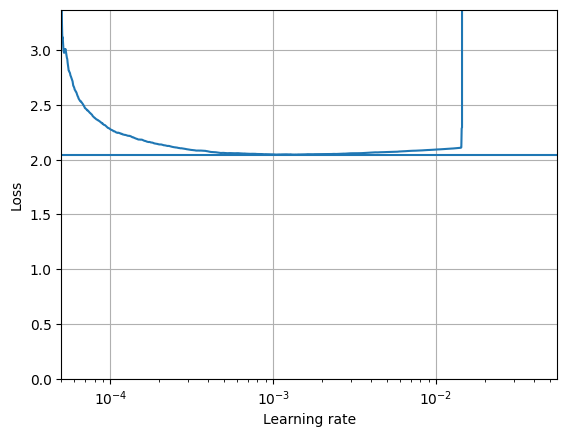

In [42]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(layers.Dense(100, activation='selu',
              kernel_initializer='lecun_normal'))

model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(
    std_scaling(X_train),
    y_train,
    epochs=1,
    validation_data=(std_scaling(X_valid), y_valid),
    callbacks=[expon_lr]
)
plot_lr(expon_lr)

In [44]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(layers.Dense(100, activation='selu',
              kernel_initializer='he_normal'))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model_dir = get_dir('models', 'model_selu')
run_logdir = get_dir('my_logs', 'run_selu')
os.makedirs('models', exist_ok=True)
os.makedirs(run_logdir, exist_ok=True)

earlystop_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_dir,
                                                save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=run_logdir)

model.fit(
    std_scaling(X_train),
    y_train,
    epochs=100,
    validation_data=(std_scaling(X_valid), y_valid),
    callbacks=[earlystop_cb, checkpoint_cb, tensorboard_cb]
)

Epoch 1/100
1407/1407 [==============================] - 33s 16ms/step - loss: 2.1228 - accuracy: 0.2617 - val_loss: 1.8502 - val_accuracy: 0.3292
Epoch 2/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7560 - accuracy: 0.3694 - val_loss: 1.7416 - val_accuracy: 0.3734
Epoch 3/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6533 - accuracy: 0.4106 - val_loss: 1.6604 - val_accuracy: 0.4074
Epoch 4/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5955 - accuracy: 0.4323 - val_loss: 1.6990 - val_accuracy: 0.4116
Epoch 5/100
1407/1407 [==============================] - 26s 18ms/step - loss: 1.5417 - accuracy: 0.4543 - val_loss: 1.6111 - val_accuracy: 0.4248
Epoch 6/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4945 - accuracy: 0.4711 - val_loss: 1.5223 - val_accuracy: 0.4594
Epoch 7/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.4443 - accuracy: 0.4878 - val_loss: 1

# E

1407/1407 [==============================] - 26s 13ms/step - loss: 2.5285 - accuracy: 0.2020 - val_loss: 6.6966 - val_accuracy: 0.1038


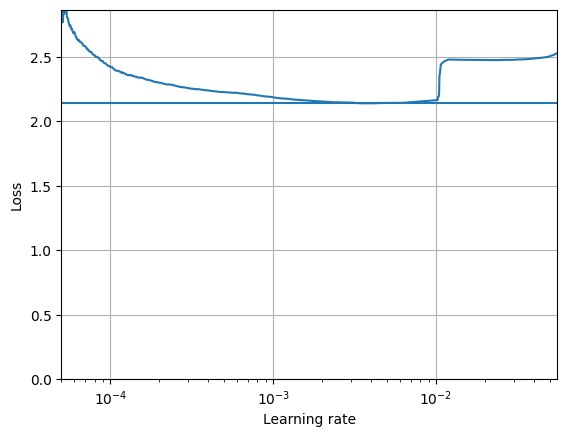

In [45]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(layers.Dense(100, activation='selu',
              kernel_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(
    std_scaling(X_train),
    y_train,
    epochs=1,
    validation_data=(std_scaling(X_valid), y_valid),
    callbacks=[expon_lr]
)
plot_lr(expon_lr)

In [46]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(layers.Dense(100, activation='selu',
              kernel_initializer='he_normal'))
model.add(layers.AlphaDropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=6e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model_dir = get_dir('models', 'model_alpha')
run_logdir = get_dir('my_logs', 'run_alpha')
os.makedirs('models', exist_ok=True)
os.makedirs(run_logdir, exist_ok=True)

earlystop_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_dir,
                                                save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=run_logdir)

model.fit(
    std_scaling(X_train),
    y_train,
    epochs=100,
    validation_data=(std_scaling(X_valid), y_valid),
    callbacks=[earlystop_cb, checkpoint_cb, tensorboard_cb]
)

Epoch 1/100
1407/1407 [==============================] - 31s 15ms/step - loss: 2.1971 - accuracy: 0.2506 - val_loss: 1.8490 - val_accuracy: 0.3290
Epoch 2/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.8110 - accuracy: 0.3439 - val_loss: 1.7608 - val_accuracy: 0.3664
Epoch 3/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7176 - accuracy: 0.3807 - val_loss: 1.7122 - val_accuracy: 0.3952
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6572 - accuracy: 0.4053 - val_loss: 1.6572 - val_accuracy: 0.4104
Epoch 5/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6023 - accuracy: 0.4282 - val_loss: 1.6933 - val_accuracy: 0.4094
Epoch 6/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5524 - accuracy: 0.4476 - val_loss: 1.6232 - val_accuracy: 0.4214
Epoch 7/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5086 - accuracy: 0.4668 - val_loss: 1

In [47]:
model = keras.models.load_model(model_dir)
model.evaluate(std_scaling(X_valid), y_valid)

157/157 [==============================] - 1s 5ms/step - loss: 1.5232 - accuracy: 0.4984


[1.5231854915618896, 0.4984000027179718]

In [10]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [11]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [12]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [51]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, std_scaling(X_valid))
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

157/157 [==============================] - 1s 3ms/step


0.4976

# F

1407/1407 [==============================] - 17s 10ms/step - loss: nan - accuracy: 0.2094 - val_loss: nan - val_accuracy: 0.1010


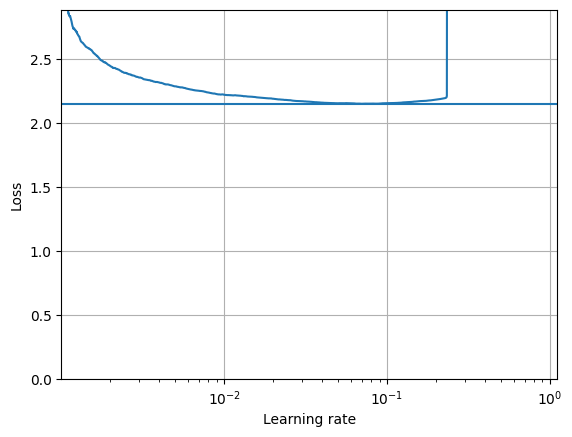

In [20]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(layers.Dense(100, activation='selu',
              kernel_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(
    std_scaling(X_train),
    y_train,
    epochs=1,
    validation_data=(std_scaling(X_valid), y_valid),
    callbacks=[expon_lr]
)
plot_lr(expon_lr)

In [21]:
K.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(layers.Dense(100, activation='selu',
              kernel_initializer='he_normal'))
model.add(layers.AlphaDropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.SGD(learning_rate=7e-3)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model_dir = get_dir('models', 'model_1cycle')
run_logdir = get_dir('my_logs', 'run_1cycle')
os.makedirs('models', exist_ok=True)
os.makedirs(run_logdir, exist_ok=True)

In [14]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [22]:
import math


n_epochs = 15
batch_size = 64
onecycle_cb = OneCycleScheduler(math.ceil(len(std_scaling(X_train)) / batch_size) * n_epochs, max_rate=0.05)
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_dir,
                                                save_best_only=True)
history = model.fit(
    std_scaling(X_train),
    y_train,
    epochs=20,
    batch_size=batch_size,
    validation_data=(std_scaling(X_valid), y_valid),
    callbacks=[onecycle_cb, tensorboard_cb, checkpoint_cb]
)

Epoch 1/20
  5/704 [..............................] - ETA: 8s - loss: 9.5241 - accuracy: 0.0781    

704/704 [==============================] - 14s 16ms/step - loss: 2.2200 - accuracy: 0.2291 - val_loss: 2.1504 - val_accuracy: 0.2530
Epoch 2/20
704/704 [==============================] - 9s 12ms/step - loss: 1.8831 - accuracy: 0.3121 - val_loss: 2.2885 - val_accuracy: 0.2184
Epoch 3/20
704/704 [==============================] - 7s 10ms/step - loss: 1.8020 - accuracy: 0.3470 - val_loss: 2.5724 - val_accuracy: 0.2368
Epoch 4/20
704/704 [==============================] - 8s 11ms/step - loss: 1.7385 - accuracy: 0.3765 - val_loss: 2.5951 - val_accuracy: 0.2598
Epoch 5/20
704/704 [==============================] - 7s 10ms/step - loss: 1.7092 - accuracy: 0.3874 - val_loss: 2.2552 - val_accuracy: 0.2920
Epoch 6/20
704/704 [==============================] - 8s 12ms/step - loss: 1.6912 - accuracy: 0.3981 - val_loss: 2.2161 - val_accuracy: 0.3098
Epoch 7/20
704/704 [==============================] - 11s 15ms/step - loss: 1.6609 - accuracy: 0.4110 - val_loss: 2.0715 - val_accuracy: 0.3006
Epoch 8/

In [23]:
model = keras.models.load_model(model_dir)
model.evaluate(std_scaling(X_valid), y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.5700 - accuracy: 0.4914


[1.5700362920761108, 0.49140000343322754]